# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
RANDOM_SEED = 42
!pip freeze > requirements.txt

In [2]:
df = pd.read_csv('main_task.xls')

In [3]:
df.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
df = df.rename(columns={"Restaurant_id": "restaurant_id", "City": "city", 
                   "Cuisine Style": "cuisine_style","Ranking": "ranking",
                   "Rating": "rating","Price Range": "price_range", 
                   "Number of Reviews": "number_of_reviews", "Reviews": "reviews",
                  "URL_TA":"url_ta", "ID_TA":"id_ta"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      40000 non-null  object 
 1   city               40000 non-null  object 
 2   cuisine_style      30717 non-null  object 
 3   ranking            40000 non-null  float64
 4   rating             40000 non-null  float64
 5   price_range        26114 non-null  object 
 6   number_of_reviews  37457 non-null  float64
 7   reviews            40000 non-null  object 
 8   url_ta             40000 non-null  object 
 9   id_ta              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### restaurant_id	

In [6]:
# Let's look at the column:
# num_of_rest = df.restaurant_id.value_counts()
# num_of_rest = num_of_rest.to_frame().reset_index()
# num_of_rest = num_of_rest.rename(columns={"index": "restaurant_id", "restaurant_id": "NumOfRest"})
# num_of_rest

In [7]:
# df[df['restaurant_id']=='id_227'].city

In [8]:
# df[df['restaurant_id']=='id_227'].url_ta

It shows that the same restaurant_id is not related to the same restaurant in different locations. Unique is ID_TA. Thus the X must be updated with ID_TA. 

### ID_TA

In [9]:
# Let's look at the column:
# num_of_rest = df.id_ta.value_counts()
# num_of_rest = num_of_rest.to_frame().reset_index()
# num_of_rest = num_of_rest.rename(columns={"index": "id_ta", "id_ta": "NumOfRest"})
# num_of_rest

In [10]:
# df = pd.merge(df, 
#                      num_of_rest, 
#                      on ='id_ta', 
#                      how ='left')
# df.head()
# After the chqck of correlation it is proved that number of restaurants has almost 0 correlation with other columns.
#  So, it can be ommited from the calculations.

### Price Range

Сколько вариантов непустых значений встречается в столбце Price Range?

In [11]:
df['price_range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

Сколько ресторанов относятся к среднему ценовому сегменту?

In [12]:
df['price_range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

In [13]:
df['price_range']=df['price_range'].fillna(value = '0')

In [14]:
price_df = pd.get_dummies(df.price_range)

In [15]:
# Добавим новые столбцы категориальные для различного ценового диапазона, рестораны без данных по цене будут иметь во всех трех колонках
# дешевый, средний, дорогой по нулю.
df['cheap']=price_df['$']
df['average'] = price_df['$$ - $$$']
df['expensive'] = price_df['$$$$']
df['no_data_price'] = price_df['0']

In [16]:
df['price_range'].isna().sum()

0

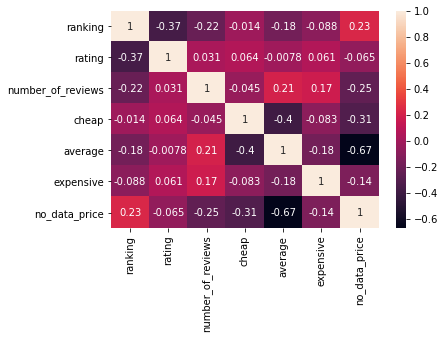

In [17]:
#Посмотрим на матрицу корреляций Довольно странно что есть корреляции между средним и дешевым. 
#Рейтинг никак не зависит  от ценового диапазона 
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(df.corr(), annot=True)
plt.show()

### Cities

Сколько городов представлено в наборе данных?

In [18]:
len(df.city.unique())

31

In [19]:
#Created dummy values for cities, joint with df.
city_df = pd.get_dummies(df.city)

In [20]:
df= df.join(city_df)

Let's create a column with country data, using dictionary. I have countewd unique cities name in datafame, and created dictionary based on Wiki:

In [21]:
def assign_country (city):
    countries = {"London": 'England',
            'Paris':'France1', 
            'Madrid': 'France1',
            'Barcelona': 'Spain1',
            'Berlin': 'Germany1',
            'Milan': 'Italy1',
            'Rome': 'Italy1',
            'Prague': 'Czech_Republic1',
            'Lisbon': 'Portugal1',
            'Vienna':  'Austria1',
            'Amsterdam': 'Netherlands1',
            'Brussels' : 'Belgium1',
            'Hamburg' : 'Germany1',
            'Munich': 'Germany1',
            'Lyon' : 'France1',
            'Stockholm': 'Sweden1',
             'Budapest': 'Hungary1',
             'Warsaw': 'Poland1',
             'Dublin' : 'Ireland1',
             'Copenhagen': 'Denmark1',
             'Athens': 'Greek1',
             'Edinburgh': 'Scotland1',
             'Zurich':'Switzerland1',
             'Oporto':'Portugal',
             'Geneva':'Switzerland1',
             'Krakow':'Polish1',
             'Oslo': 'Norway1',
             'Helsinki': 'Finland1',
             'Bratislava': 'Slovakia1',
             'Luxembourg': 'Luxembourg1',
             'Ljubljana': 'Slovenia1'}
    return countries[city]

In [22]:
df['country'] = df['city'].apply(assign_country)
country_df = pd.get_dummies(df.country)
df= df.join(country_df)

### Кухни

Сколько типов кухонь представлено в наборе данных?

In [23]:
df['cuisine_style']
# df = df['cuisine_style'].fillna(value='')

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: cuisine_style, Length: 40000, dtype: object

In [24]:
type(df.iloc[0]['cuisine_style'])

str

In [25]:
df['cuisine_style'] = df['cuisine_style'].str.replace('[', '')
df['cuisine_style'] = df['cuisine_style'].str.replace(']', '')
df['cuisine_style'] = df['cuisine_style'].str.replace("'", '')
df['cuisine_style'] = df['cuisine_style'].str.replace(" ", '')

# df['Cuisine Style'] = df['Cuisine Style'].str.split(',')
#adding new column number of cusines in one restraunt

Сколько типов кухонь представлено в наборе данных? 

Какая кухня представлена в наибольшем количестве ресторанов? Введите название кухни без кавычек или апострофов.

In [26]:
pd.Series(df['cuisine_style'].str.cat(sep=',').split(',')).value_counts()

VegetarianFriendly    11189
European              10060
Mediterranean          6277
Italian                5964
VeganOptions           4486
                      ...  
Latvian                   1
Xinjiang                  1
Yunnan                    1
Salvadoran                1
Burmese                   1
Length: 125, dtype: int64

In [27]:
df['cuisine_style'] = df['cuisine_style'].str.split(',') #Convert to List using method split(by ',')


In [28]:
df['cuisine_style'] = df['cuisine_style'].fillna(value=' ')

In [29]:
df.cuisine_style.isna().sum()

0

In [30]:
df['cuisine_numbers'] = df.cuisine_style.apply(lambda x: len(x))

Какое среднее количество кухонь предлагается в одном ресторане? Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни. Ответ округлите до одного знака после запятой.

In [31]:
df['cuisine_numbers'].mean()

2.6224

In [32]:
#Created dummy values for cuisines, joint with df.
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
cuisines_df = pd.DataFrame(mlb.fit_transform(df['cuisine_style']),columns=mlb.classes_)

In [33]:
df= df.join(cuisines_df)

### Reviews

In [34]:
import re
from datetime import datetime
pattern = re.compile("\d+\/\d+\/\d+")
df['Date_of_Reviews'] = df['reviews'].apply(pattern.findall)
df['Date_of_Reviews1']=pd.to_datetime(df['Date_of_Reviews'].str[0])
df['Date_of_Reviews2']=pd.to_datetime(df['Date_of_Reviews'].str[1])
df['Delta_time'] = (df['Date_of_Reviews2']-df['Date_of_Reviews1'])
df['Delta_time'] = pd.to_numeric(df['Delta_time'].dt.days, downcast='integer')

In [35]:
#IDs related to different restaurants, in the URL_TA it is easy to check.
# num_of_rest = df.restaurant_id.value_counts()
# num_of_rest = num_of_rest.to_frame().reset_index()
# num_of_rest = num_of_rest.rename(columns={"index": "restaurant_id", "restaurant_id": "NumOfRest"})
# df = pd.merge(df, num_of_rest, on ='restaurant_id', how ='left')

sentiment analysis - adapted codefrom github 
 https://github.com/attreyabhatt/Sentiment-Analysis/blob/master/emotions.txt

In [36]:
# defined function to determine the emotion based on the words in the reviews (MAE decreased on 0.02)
import string
from collections import Counter

import matplotlib.pyplot as plt

def emotions(text):

    # reading reviews from dataset

    # converting to lowercase
    lower_case = text.lower()

    # Removing punctuations
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

#     # splitting text into words
    tokenized_words = cleaned_text.split()

    stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
                  "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                  "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
                  "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
                  "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
                  "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
                  "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
                  "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
                  "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
                  "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#         # Removing stop words from the tokenized words list
    final_words = []
    for word in tokenized_words:
        if word not in stop_words:
            final_words.append(word)

#     # NLP Emotion Algorithm
#     # 1) Check if the word in the final word list is also present in emotion.txt
#     #  - open the emotion file
#     #  - Loop through each line and clear it
#     #  - Extract the word and emotion using split

#     # 2) If word is present -> Add the emotion to emotion_list
#     # 3) Finally count each emotion in the emotion list

    emotion_list = []
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
            word, emotion = clear_line.split(':')

            if word in final_words:
                emotion_list.append(emotion)

    
#     w = Counter(emotion_list)- not used
    return (emotion_list)

In [45]:
review = df["reviews"].str()


TypeError: 'StringMethods' object is not callable

In [71]:
pd.Series(df.reviews.str.cat(sep=' ').lower().translate(str.maketrans('', '', string.punctuation)).split(' ')).value_counts().head(100)



            15911
food        10403
good         9340
great        8514
and          7865
            ...  
indian        411
night         407
burger        402
12222017      402
as            398
Length: 100, dtype: int64

In [ ]:
#added emotions column to the dataframe
df['emotion']=df.reviews.apply(emotions)

In [ ]:
#created dummy variables from the list of emotions
mlb = MultiLabelBinarizer()
emotion_df = pd.DataFrame(mlb.fit_transform(df['emotion']),columns=mlb.classes_)

In [ ]:
df= df.join(emotion_df)

In [ ]:
# Let's define number of reviews 0, 1, 2

df['cuisine_numbers'] = df.cuisine_style.apply(lambda x: len(x))

In [ ]:
df['reviews']

In [ ]:
# Lets create columns with lub of reviews (1 and 2) = ZERO improvements for the model
# df['reviews'] = df['reviews'].str.replace('[', '')
# df['reviews'] = df['reviews'].str.replace(']', '')
# df['reviews'] = df['reviews'].str.replace("'", '')
# df['reviews']=df['reviews'].str.split(',')
# df['rev_1'] = df['reviews'].str[0]
# df['rev_2'] = df['reviews'].str[1]
# df['len_rev_1']=df['rev_1'].apply(lambda x: len(x))
# df['len_rev_2']=df['rev_2'].apply(lambda x: len(x))

# Rating

In [ ]:
df.rating.value_counts()

# Ranking

In [ ]:
df.ranking.mean()

# Dropping non-numerical data from dataframe

In [ ]:
df = df.drop(labels = ['city', 'cuisine_style', 'price_range', 'reviews', 'url_ta', 'restaurant_id','Date_of_Reviews',
                       'Date_of_Reviews1','Date_of_Reviews2','emotion', 'country'], axis = 1)

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isna().any()[lambda x: x]

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [ ]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['id_ta', 'rating'], axis = 1)
y = df['rating']

In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
y_pred =  (y_pred * 2).round(0) / 2

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
df.info()